In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df_climate = pd.read_csv('./../db/GlobalLandTemperaturesByCountry.csv')
print(df_climate.shape)
print(df_climate.head())

(577462, 4)
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 13.2+ MB
None


In [6]:
# .info()
# Resumen del df y consumo de memoria
print(df_climate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 13.2+ MB
None


In [7]:
# Acceder a los valores unicos de una columna
print(df_climate['Country'].unique())


['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

In [8]:
# Seteando columna de tipo tiempo
df_climate['date'] = pd.to_datetime(df_climate['dt'])
print(df_climate.dtypes)

dt                                       object
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
date                             datetime64[ns]
dtype: object


In [9]:
# Creando una serie como filtro
idx_filtro = df_climate['date'] > pd.to_datetime('1970-01-01')
df_climate = df_climate[idx_filtro]
print(df_climate.shape)


(127332, 5)


In [11]:
apply_functions = {
    'AverageTemperature': [np.mean, np.median]
}

df_avg = df_climate.groupby(['Country',
                             pd.Grouper(key='date', freq='1Y')]).aggregate(apply_functions)
print(df_avg)

# Filtro de filas, devolviendo otra columna agrupada
print(df_avg.loc['Mexico']['AverageTemperature'])

                       AverageTemperature         
                                     mean   median
Country     date                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]
                 mean   median
date                          
1970-12-31  21.036182  21.5130
1971-12-31  20.640333  20.6605
1972-12-31  20.975000  22.1485
1973-12-31  20.496167  20.8200
1974-12-31  20.631500  21.0005
1975-12-31  20.449333  20.9585
1976-12-31  

In [12]:
# Un df a partir de una agrupacion, generando un id numerico
df_t_med = df_avg['AverageTemperature'][['median']].reset_index()
print(df_t_med.head(5))

       Country       date   median
0  Afghanistan 1970-12-31  16.1990
1  Afghanistan 1971-12-31  14.9340
2  Afghanistan 1972-12-31  13.8725
3  Afghanistan 1973-12-31  14.9130
4  Afghanistan 1974-12-31  13.6160


In [13]:
# Extrayendo partes de fecha a partir de un tipo date
df_t_med['year'] = df_t_med['date'].dt.year
print(df_t_med.head(5))

       Country       date   median  year
0  Afghanistan 1970-12-31  16.1990  1970
1  Afghanistan 1971-12-31  14.9340  1971
2  Afghanistan 1972-12-31  13.8725  1972
3  Afghanistan 1973-12-31  14.9130  1973
4  Afghanistan 1974-12-31  13.6160  1974


In [17]:
# Renombrando columnas
# columns={'current_name_column':'new_name_column'}
# inplace=True // modifica el mismo dataframe
df_t_med.rename(columns={'median': 'median_temperature'}, inplace=True)
print(df_t_med.head(5))

       Country       date  median_temperature  year
0  Afghanistan 1970-12-31             16.1990  1970
1  Afghanistan 1971-12-31             14.9340  1971
2  Afghanistan 1972-12-31             13.8725  1972
3  Afghanistan 1973-12-31             14.9130  1973
4  Afghanistan 1974-12-31             13.6160  1974


In [20]:
# Tabla pivote
# values=['median_temperature'] // valor a calcular
#  index=['year'] // filas o agrupacion
# columns=['Country'] // columnas a pivotear horizontalmente
df_t_pivot = df_t_med.pivot_table(values=['median_temperature'], index=['year'], columns=['Country'])
df_t_pivot

median_temperature                                                     \
Country        Afghanistan   Africa  Albania  Algeria American Samoa  Andorra   
year                                                                            
1970               16.1990  25.2360  12.4230  23.2840        26.7180  11.6390   
1971               14.9340  24.7755  11.6735  22.7810        26.4845  11.9275   
1972               13.8725  25.1230  11.2175  22.4985        26.8205  10.0250   
1973               14.9130  25.3445  11.8370  22.9975        27.0120   9.5525   
1974               13.6160  24.8260  11.3210  21.5795        26.6350   8.2045   
1975               13.5130  24.8045  12.3595  23.0740        26.6510  10.4105   
1976               14.1615  24.8225  12.6080  22.2980        26.6155   9.6625   
1977               15.6575  25.0345  11.9870  23.5375        26.7085  10.4055   
1978               15.2580  24.9135  11.5490  22.5620        26.7250   9.7565   
1979               16.2990  25.3705  11.7765  23.1455        26.8385  10.4145   
1980               16.3110  25.2955  11.9060  23.1765        26.9700   9.8455   
1981               14.4390  25.2910  13.3060  24.6310        26.8290  11.2490   
1982               15.0705  25.1225  12.4050  23.0310        26.8895  10.8620   
1983               13.6025  25.4250  12.6770  23.9725        26.9605  11.1960   
1984               14.4185  25.2940  12.7785  23.3215        26.8765  10.2310   
1985               14.8955  24.9255  12.6220  23.3455        26.8040  11.2395   
1986               15.1815  25.1730  13.3720  23.5470        27.1245  10.9900   
1987               13.6260  25.5695  12.5730  24.7010        27.1080  11.4880   
1988               15.2810  25.4000  12.3825  24.6335        26.9025  11.9130   
1989               14.6015  25.1320  12.9095  23.7400        26.7715  11.1915   
1990               14.4935  25.6785  13.4490  24.5480        27.2050  11.3630   
1991               14.3920  25.2885  11.5885  23.0320        27.0785   9.9675   
1992               13.7520  25.4245  13.5850  23.0325        27.0925  10.1285   
1993               14.0685  25.6620  13.6500  23.7730        27.0890  10.0595   
1994               13.6150  25.2650  13.2390  22.9560        27.0020  11.2280   
1995               14.4835  25.5005  11.8750  23.0965        27.3490  12.2240   
1996               14.5665  25.3650  11.7315  23.2925        27.2245  11.1270   
1997               15.2480  25.4135  10.7790  23.5340        26.9840  12.7180   
1998               15.7670  25.9285  13.4790  24.4580        27.3975  10.5570   
1999               15.5875  25.5770  13.5485  25.5620        26.9660  11.7000   
2000               16.8560  25.4540  13.9625  24.2205        27.3200  11.0310   
2001               16.3620  25.8030  13.7490  25.3240        27.2835  12.6740   
2002               16.4970  25.7410  12.5335  23.8485        27.7370  11.8895   
2003               15.4800  26.0325  12.1450  25.3615        27.0420  11.1290   
2004               14.6700  25.7840  13.6610  24.8325        27.3035  11.3525   
2005               15.5190  26.0680  12.4485  25.3350        27.4560  12.0625   
2006               16.6300  25.9285  13.6685  25.7525        26.9235  13.2795   
2007               15.4785  25.6990  13.1770  24.3050        27.4810  12.3455   
2008               16.3810  25.6660  13.2985  24.4435        27.0560  11.1975   
2009               13.8930  25.8935  13.1795  23.7635        26.9025  11.6925   
2010               17.4285  26.1595  12.6825  25.4575        27.3260  11.4400   
2011               16.0240  25.6220  12.4440  24.1415        27.0205  13.4625   
2012               15.6755  25.5670  13.9060  24.5915        27.1620  11.5065   
2013               18.1000  25.7865  15.9465  26.3620        27.6665  10.9400   

                                                         ...           \
Country   Angola Anguilla Antigua And Barbuda Argentina  ...  Uruguay   
year                                                  

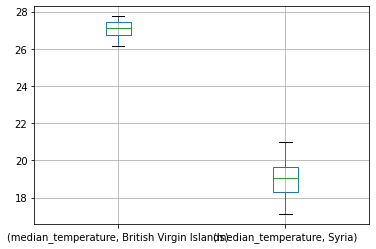

In [21]:
# Generando un grafico de caja de bigotes o boxplot
# .sample(value) // Escoge aletariamente la cantidad de registros especificados
df_t_pivot_sample = df_t_pivot.T.sample(2).T.boxplot()
plt.show()